In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/content/stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Preprocessing


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [26]:
df.fillna(df['bmi'].mean(),inplace=True)

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


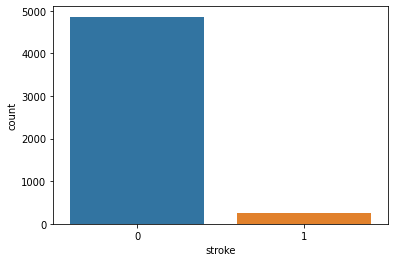

In [28]:
sns.countplot(x='stroke',data=df)

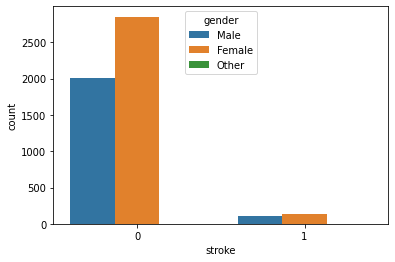

In [29]:
sns.countplot(x='stroke',hue='gender',data=df)

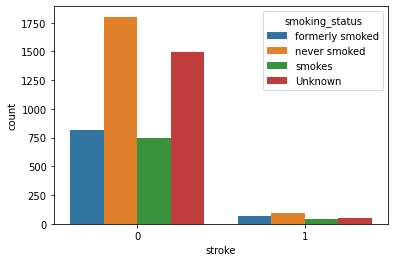

In [30]:
sns.countplot(x='stroke',hue='smoking_status',data=df)

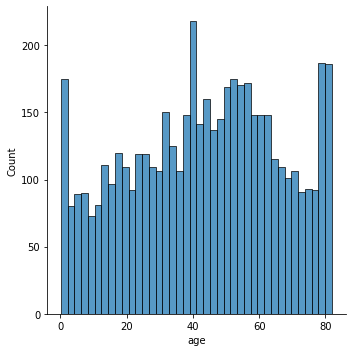

In [36]:
sns.displot(df['age'],bins=40)

In [38]:
df = pd.get_dummies(df,drop_first=True)

In [41]:
df.drop(labels='id',inplace=True,axis=1)

In [42]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [43]:
X = df.drop(labels='stroke',axis=1)

In [44]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0


In [45]:
Y = df[['stroke']]

In [46]:
Y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [49]:
Y.value_counts()

stroke
0         4861
1          249
dtype: int64

handling imbalanced data

In [50]:
from imblearn.combine import SMOTETomek

In [68]:
smk = SMOTETomek(random_state=40)
X_res,Y_res = smk.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [69]:
X_res.shape

(9636, 16)

In [70]:
Y_res.shape

(9636,)

In [71]:
from collections import Counter

In [72]:
Counter(Y_res)

Counter({0: 4818, 1: 4818})

In [48]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(X_res,Y_res,random_state=10,shuffle=True,test_size=0.2)

In [75]:
print('Train :{}'.format(xtrain.shape))
print('Test :{}'.format(xtest.shape))

Train :(7708, 16)
Test :(1928, 16)


Modeling

In [76]:
from sklearn.linear_model import LogisticRegression

Logistic Regression

In [81]:
lr = LogisticRegression()

In [82]:
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
lr.score(xtrain,ytrain)

0.7859366891541256

In [89]:
lr.score(xtest,ytest)

0.7759336099585062

In [97]:
params = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':['newton-cg', 'liblinear', 'sag', 'saga']


}

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
random_search = RandomizedSearchCV(lr,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3)

In [105]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.3s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
             

In [106]:
random_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
lr2 = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
lr2.fit(xtrain,ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
lr2.score(xtrain,ytrain)

0.7841203943954334

In [111]:
lr2.score(xtest,ytest)

0.7728215767634855

In [156]:
yp_lr = lr2.predict(xtest)

KNN


In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
kn = KNeighborsClassifier()

In [115]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [116]:
kn.score(xtrain,ytrain)

0.9187856772184743

In [117]:
kn.score(xtest,ytest)

0.8983402489626556

In [120]:
params ={
    'n_neighbors':[x for x in range(1,100,5)],
    'leaf_size':[x for x in range(1,100,5)],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'rute']
}

In [123]:
random_search = RandomizedSearchCV(kn,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,verbose=3)

In [124]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'rute'],
                                        'leaf_size': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46, 51, 56, 61,
                                                      66, 71, 76, 81, 86, 91,
                                                      96],
                           

In [125]:
random_search.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=16, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [126]:
kn2 = KNeighborsClassifier(algorithm='kd_tree', leaf_size=16, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [128]:
kn2.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=16, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [129]:
kn2.score(xtrain,ytrain)

0.922677737415672

In [130]:
kn2.score(xtest,ytest)

0.9045643153526971

In [155]:
yp_kn = kn2.predict(xtest)

Decision Tree


In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dt = DecisionTreeClassifier()

In [133]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [134]:
dt.score(xtrain,ytrain)

1.0

In [135]:
dt.score(xtest,ytest)

0.9434647302904564

In [144]:
params = {
    'criterion':['gini', 'entropy'],
    'max_depth':[x for x in range(1,10)],
    'min_samples_split':[x for x in range(1,10)],
    'min_samples_leaf': [x for x in range(1,10)]

}

In [146]:
random_search = RandomizedSearchCV(dt,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,verbose=3)

In [147]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [148]:
random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [149]:
dt2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
dt2.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [151]:
dt2.score(xtrain,ytrain)

0.9368188894654904

In [152]:
dt2.score(xtest,ytest)

0.9268672199170125

In [157]:
yp_dt = dt2.predict(xtest)

In [154]:
from sklearn.metrics import confusion_matrix

In [158]:
cm_lr = confusion_matrix(ytest,yp_lr)

cm_kn = confusion_matrix(ytest,yp_kn)

cm_dt = confusion_matrix(ytest,yp_dt)

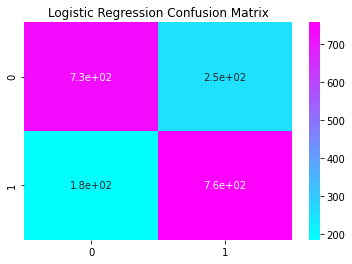

In [159]:
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap='cool')

In [160]:
xtest.shape

(1928, 16)

In [161]:
cm_lr

array([[732, 253],
       [185, 758]])

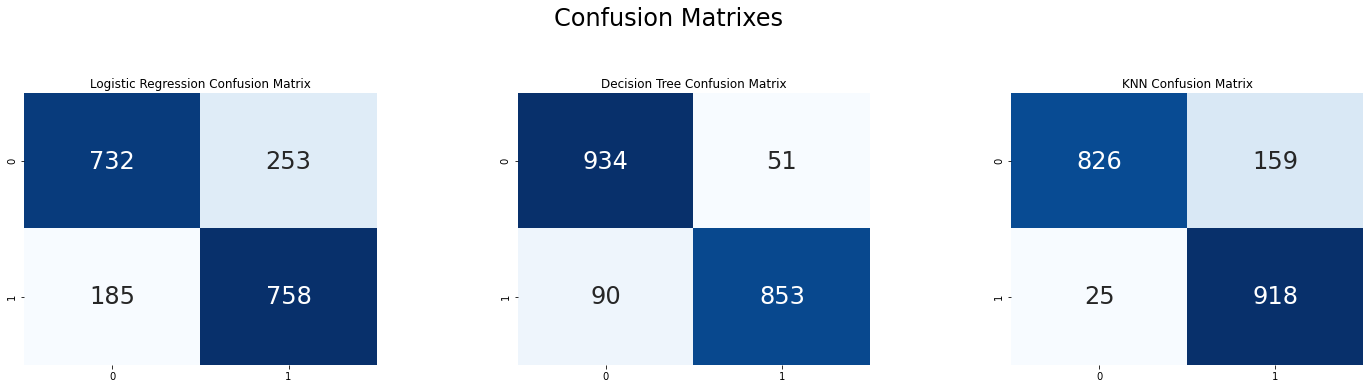

In [162]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes ",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_kn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [163]:
from sklearn.metrics import classification_report

In [165]:
print(classification_report(ytest,yp_dt))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       985
           1       0.94      0.90      0.92       943

    accuracy                           0.93      1928
   macro avg       0.93      0.93      0.93      1928
weighted avg       0.93      0.93      0.93      1928



In [166]:
print(classification_report(ytest,yp_kn))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       985
           1       0.85      0.97      0.91       943

    accuracy                           0.90      1928
   macro avg       0.91      0.91      0.90      1928
weighted avg       0.91      0.90      0.90      1928



In [167]:
model = dt2

In [170]:
import pickle

In [171]:
pickle_out = open("classifier.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()